In [1]:
#import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import boxcox1p
#from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PowerTransformer
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data Collection

In [2]:
# load dataset
data = pd.read_csv(r"C:\Users\nafla\Downloads\steel+industry+energy+consumption\Steel_industry_data.csv")
data

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


# Data Preprocessing

In [3]:
data.shape

(35040, 11)

#### The dataset contains 35040 rows and 11 columns

In [4]:
data.columns


Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [5]:
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [6]:
data.tail()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load
35039,31/12/2018 00:00,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Monday,Light_Load


## Observation:
### The column 'date' is not going to contribute anything in the model building. So we can drop them.







In [7]:
data.drop(columns=['date'] ,axis=1, inplace = True)
data

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [8]:
# datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  object 
 8   Day_of_week                           35040 non-null  object 
 9   Load_Type                             35040 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.7+ MB


## Missing values check

In [9]:
# missing values check
data.isnull().sum()/len(data)*100

Usage_kWh                               0.0
Lagging_Current_Reactive.Power_kVarh    0.0
Leading_Current_Reactive_Power_kVarh    0.0
CO2(tCO2)                               0.0
Lagging_Current_Power_Factor            0.0
Leading_Current_Power_Factor            0.0
NSM                                     0.0
WeekStatus                              0.0
Day_of_week                             0.0
Load_Type                               0.0
dtype: float64

### The dataset has no null values.

## Duplicates check

In [10]:
# check for duplicated rows
data.duplicated().sum()

81

### This dataset contains 81 duplicates so we can drop them.

In [11]:
data.drop_duplicates(inplace=True)
data.shape

(34959, 10)

### The following table indicates the statistical analysis of the dataset. From here we can identify the count of rows,mean,standard deviation, minimum value, 25%, 50%, 75% and maximum values in each features. For a normally distributed dataset, the mean and 50% values are closer, variations from each indiactes the presence of outliers in the corresponding features.

In [12]:
# statistical analysis
data.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,34959.000000,34959.000000,34959.000000,34959.000000,34959.000000,34959.000000,34959.000000
mean,27.443111,13.056014,3.875959,0.011551,80.625036,84.350093,42781.343860
std,33.462669,16.319073,7.427964,0.016160,18.902835,30.467553,24923.195433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.420000,99.690000,21600.000000
50%,4.570000,5.000000,0.000000,0.000000,88.000000,100.000000,43200.000000
75%,51.300000,22.720000,2.090000,0.020000,99.040000,100.000000,64800.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [13]:
data.nunique()

Usage_kWh                               3343
Lagging_Current_Reactive.Power_kVarh    1954
Leading_Current_Reactive_Power_kVarh     768
CO2(tCO2)                                  8
Lagging_Current_Power_Factor            5079
Leading_Current_Power_Factor            3366
NSM                                       96
WeekStatus                                 2
Day_of_week                                7
Load_Type                                  3
dtype: int64

## Selecting numerical columns

In [14]:
num_data = data.select_dtypes(include='number')
numeric_columns=list(num_data)
numeric_columns

['Usage_kWh',
 'Lagging_Current_Reactive.Power_kVarh',
 'Leading_Current_Reactive_Power_kVarh',
 'CO2(tCO2)',
 'Lagging_Current_Power_Factor',
 'Leading_Current_Power_Factor',
 'NSM']

## Checking skewness

In [15]:
num_data.skew()

Usage_kWh                               1.194046
Lagging_Current_Reactive.Power_kVarh    1.434391
Leading_Current_Reactive_Power_kVarh    1.732458
CO2(tCO2)                               1.145943
Lagging_Current_Power_Factor           -0.610658
Leading_Current_Power_Factor           -1.510146
NSM                                    -0.002367
dtype: float64

## Checking Outliers

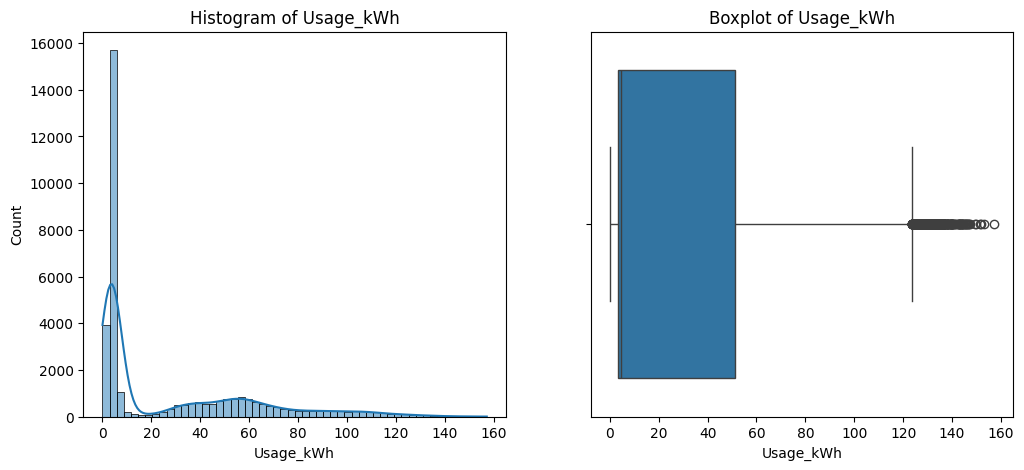

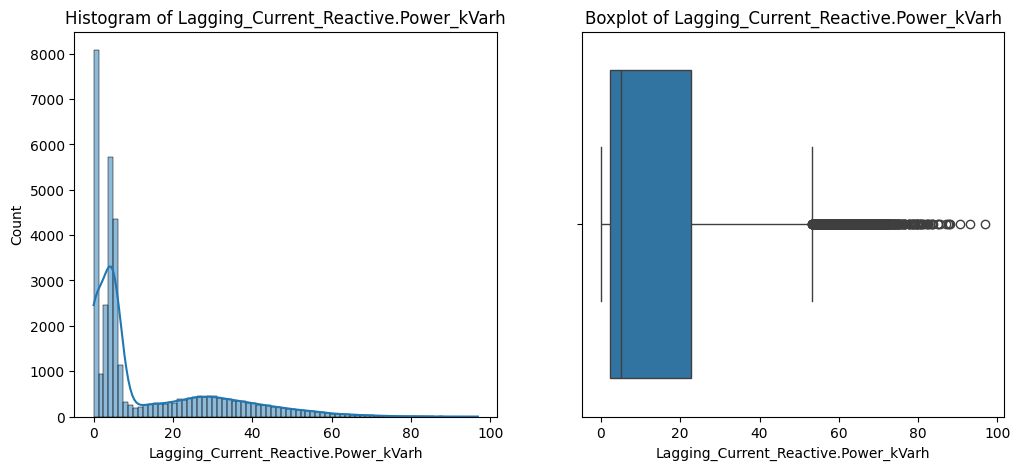

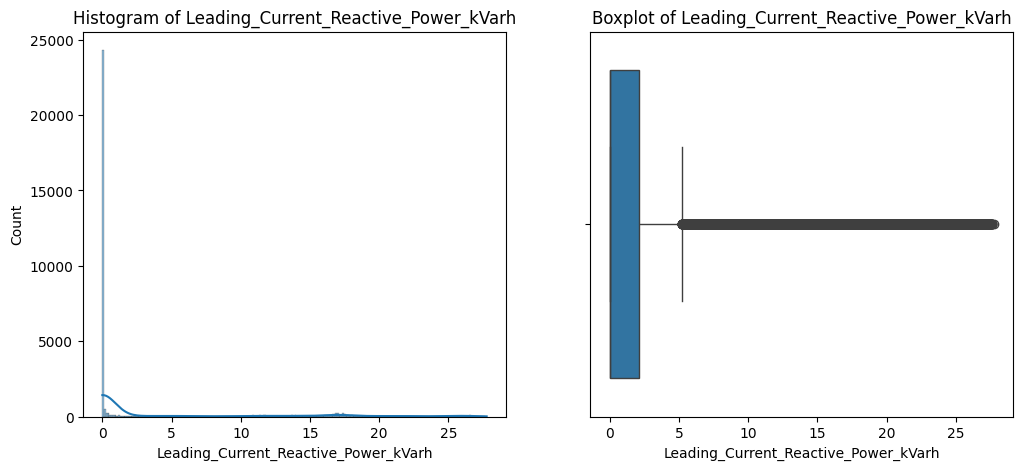

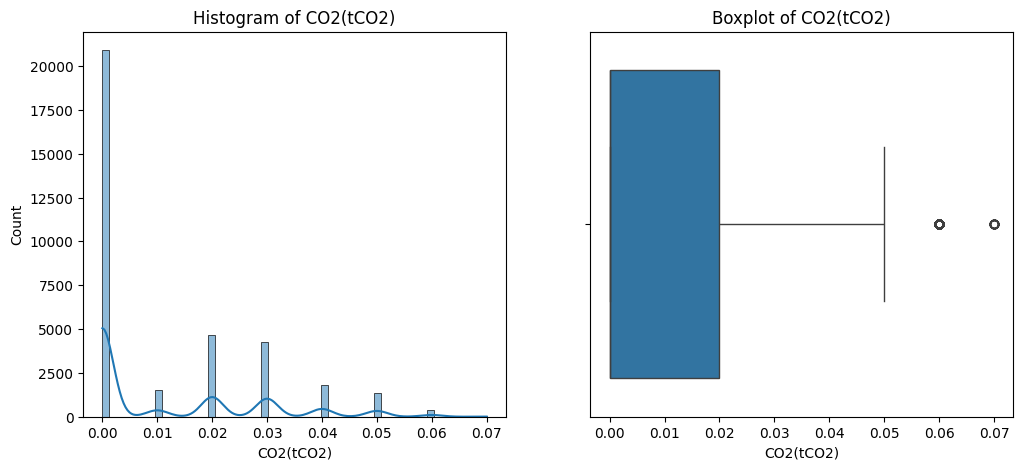

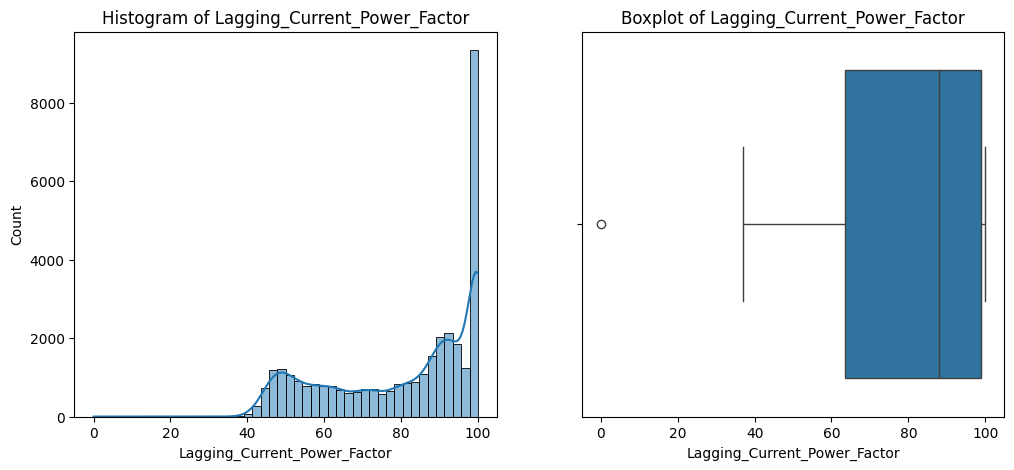

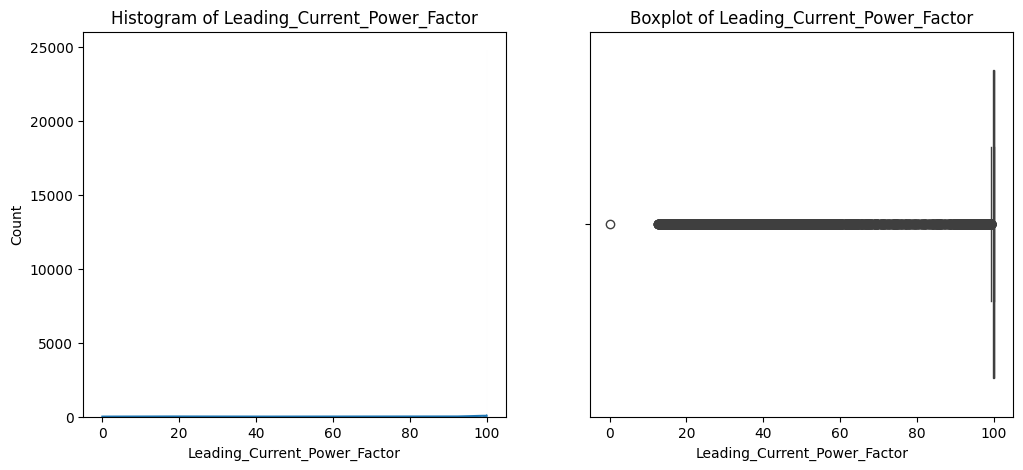

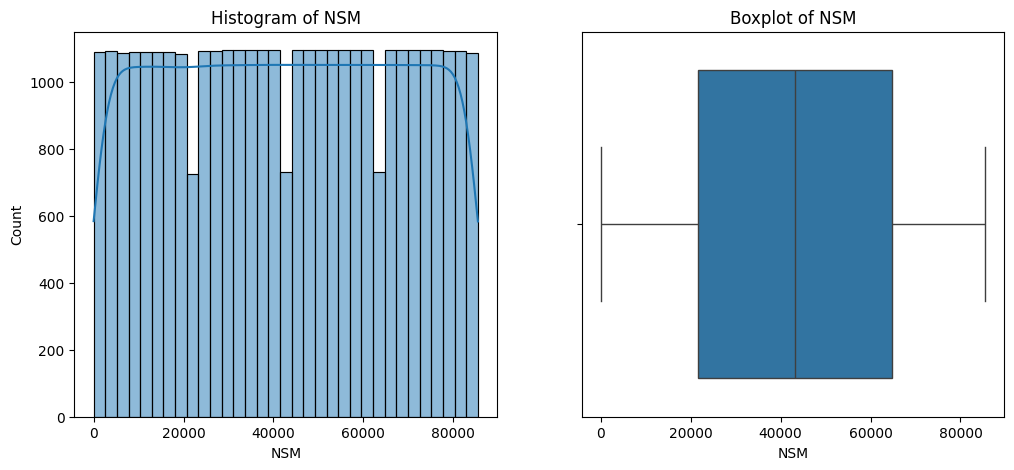

In [16]:
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

In [17]:
# Remove outliers using Z-score method
#data = data[(np.abs(stats.zscore(data.select_dtypes(include=['float64','int64']))) < 3).all(axis=1)]


## Treating outliers

In [19]:
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, np.where(data[col] > upper_bound, upper_bound, data[col]))

# Condition 1: If the value is less than the lower bound,Replace it with the lower bound.
# Condition 2: Else if the value is greater than the upper bound,Replace it with the upper bound.
# Else keep the original value.
print("Outliers have been capped for all numeric columns.")
print(data)

Outliers have been capped for all numeric columns.
       Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0           3.17                                  2.95   
1           4.00                                  4.46   
2           3.24                                  3.28   
3           3.31                                  3.56   
4           3.82                                  4.50   
...          ...                                   ...   
35035       3.85                                  4.86   
35036       3.74                                  3.74   
35037       3.78                                  3.17   
35038       3.78                                  3.06   
35039       3.67                                  3.02   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                      0.00        0.0   
1                                      0.00        0.0   
2                                      0.00        0.0   
3                   

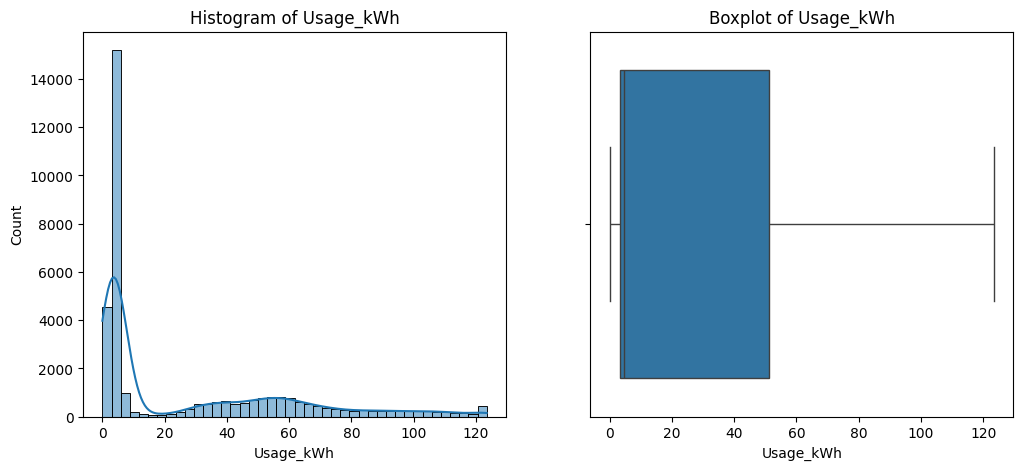

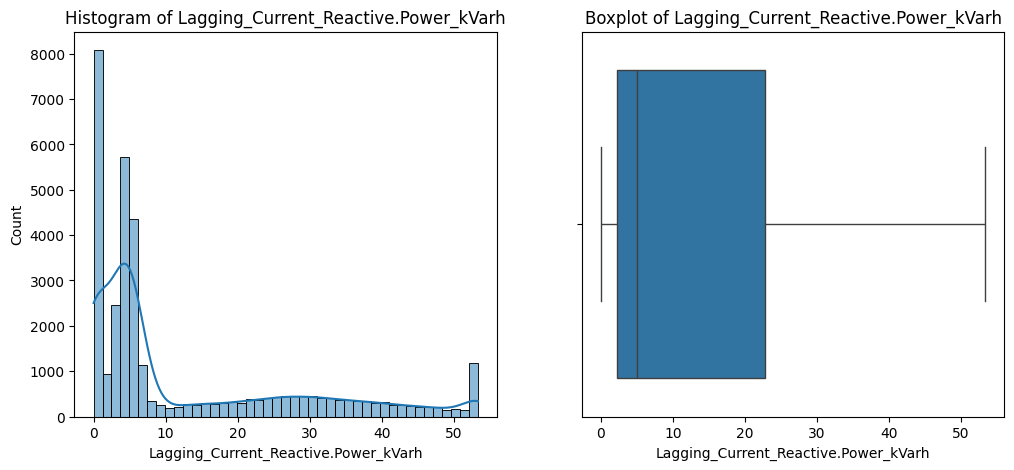

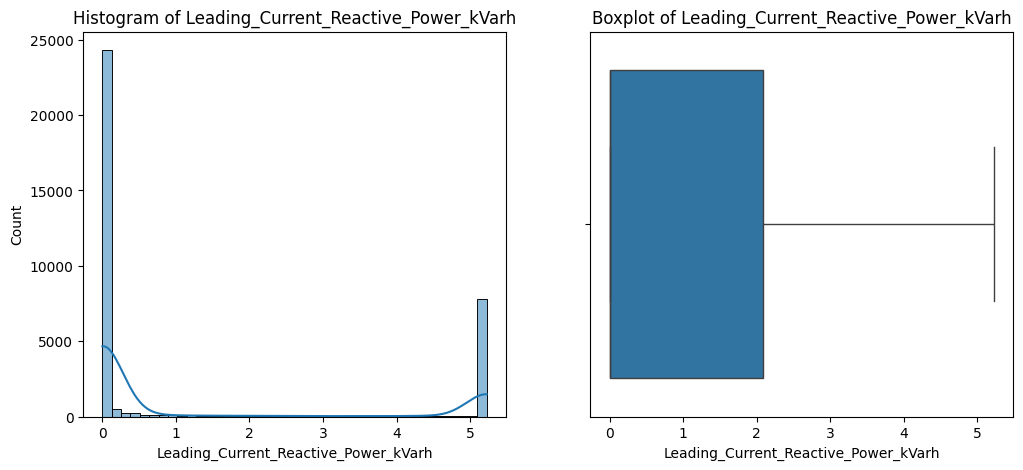

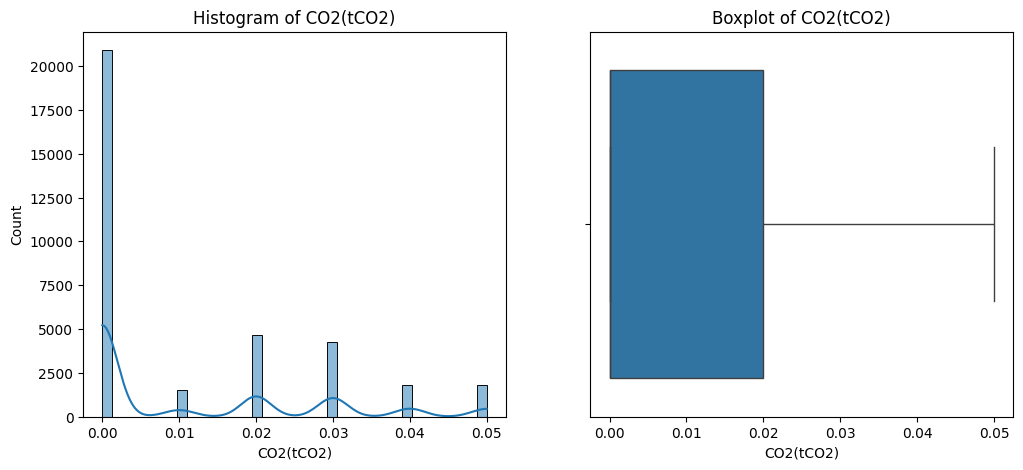

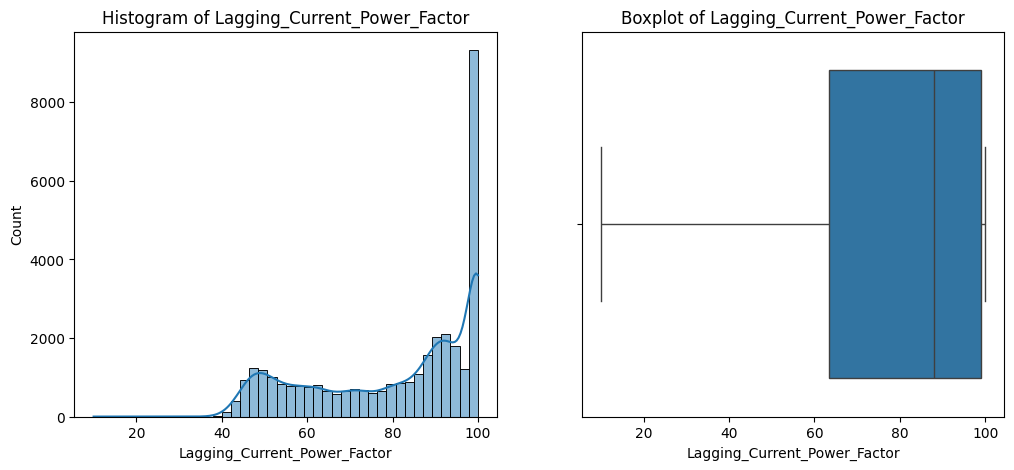

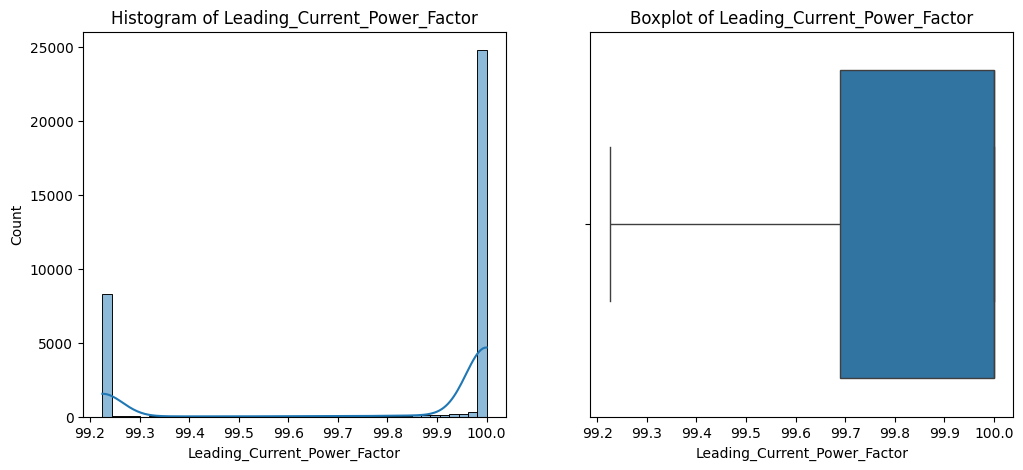

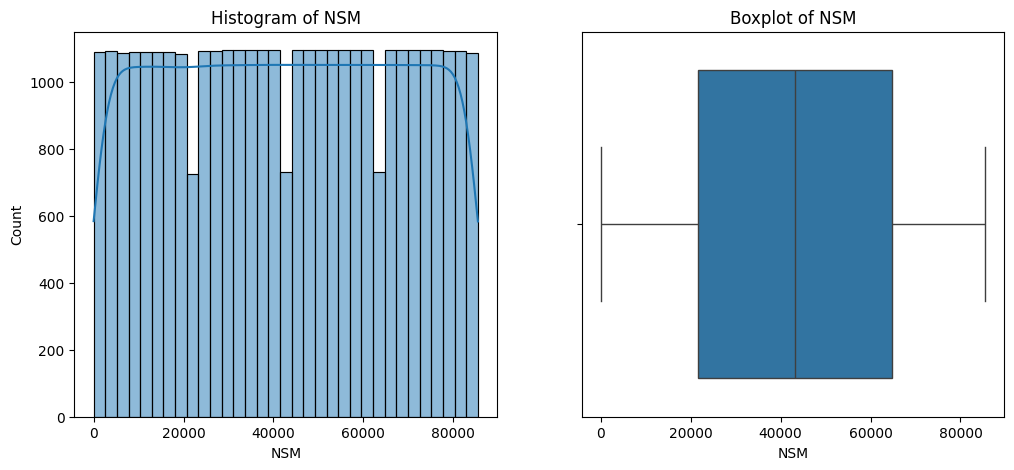

In [25]:
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

 ### here we use IQR method to treat outliers because other methods deduct number of rows extremely.

In [21]:
data.select_dtypes(include="number").skew()

Usage_kWh                               1.160594
Lagging_Current_Reactive.Power_kVarh    1.252707
Leading_Current_Reactive_Power_kVarh    1.168726
CO2(tCO2)                               1.055399
Lagging_Current_Power_Factor           -0.610087
Leading_Current_Power_Factor           -1.160587
NSM                                    -0.002367
dtype: float64

### We can see some changes in skewness level after treating outliers. Now we use methods like Log Trasform and Yeo-Johnson transformation to treat skewness.

In [23]:
 #Function to apply skewness reduction
def reduce_skewness(data, columns):
    data_transformed = data.copy()
    
    for col in columns:
        if data[col].min() > 0:  # If all values are positive, apply Log Transform
            data_transformed[col] = np.log1p(data[col])  # log(x + 1) to handle zeros
        else:  # For negative or mixed values, apply Yeo-Johnson transformation
            pt = PowerTransformer(method='yeo-johnson')
            data_transformed[col] = pt.fit_transform(data[[col]])  # Sklearn handles NaN automatically
    
    return data_transformed

# Apply skewness correction
data = data_transformed = reduce_skewness(data,numeric_columns)


In [26]:
data.select_dtypes(include="number").skew()

Usage_kWh                               0.214530
Lagging_Current_Reactive.Power_kVarh   -0.017958
Leading_Current_Reactive_Power_kVarh    0.851369
CO2(tCO2)                               0.445250
Lagging_Current_Power_Factor           -0.891518
Leading_Current_Power_Factor           -1.160788
NSM                                    -0.067888
dtype: float64

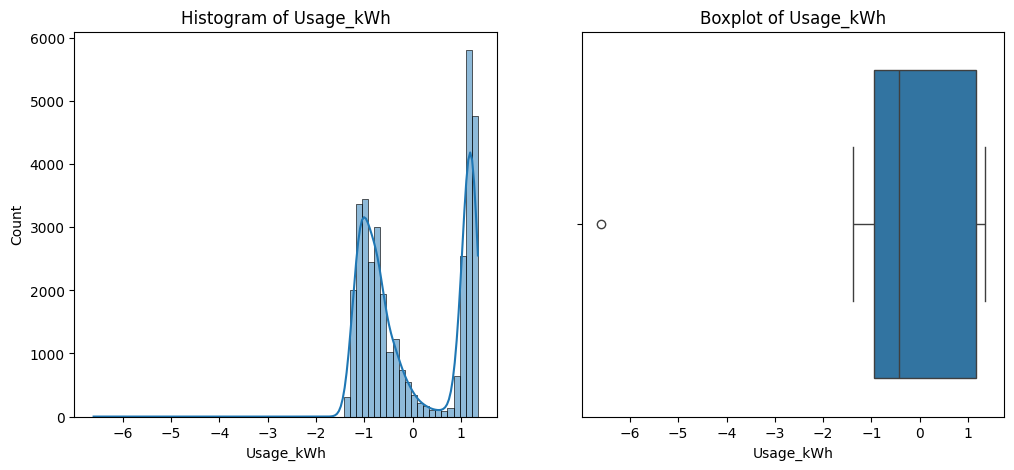

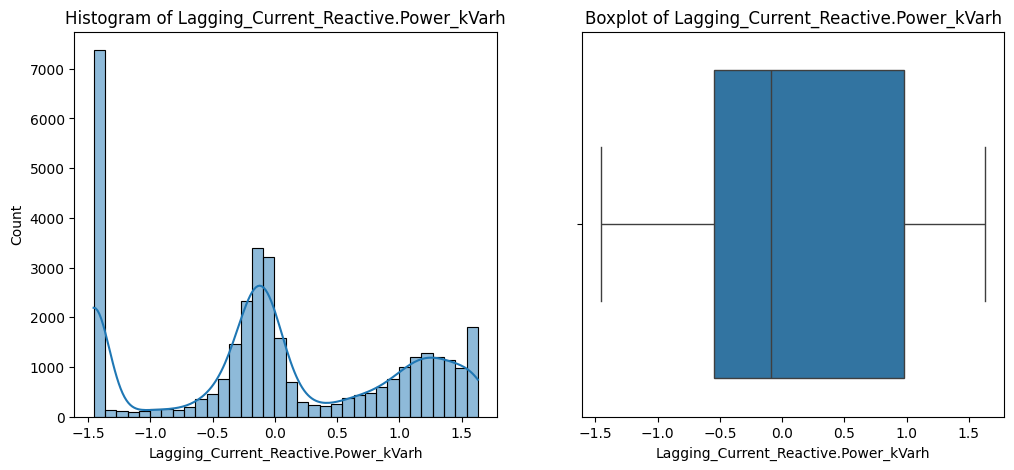

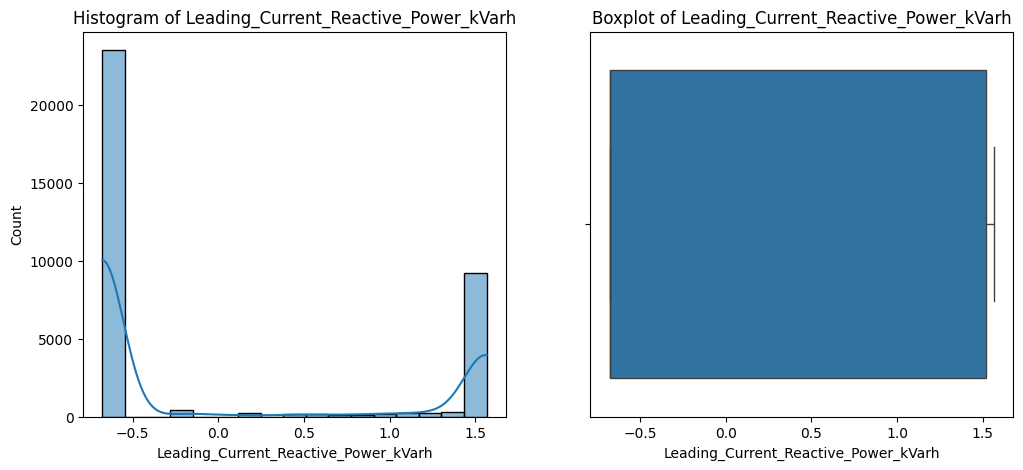

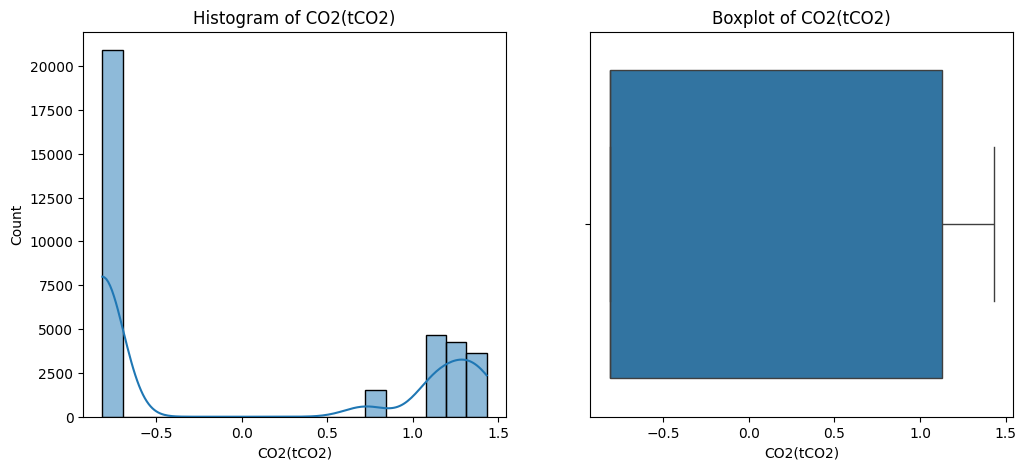

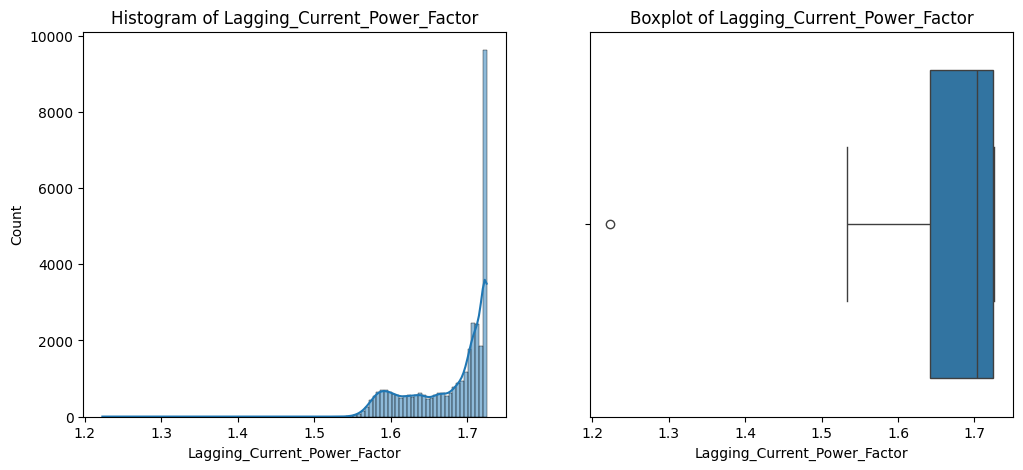

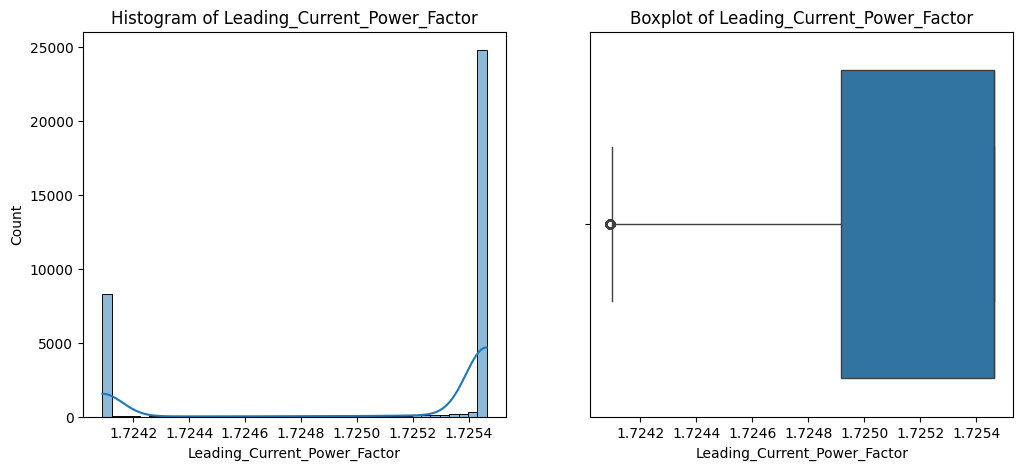

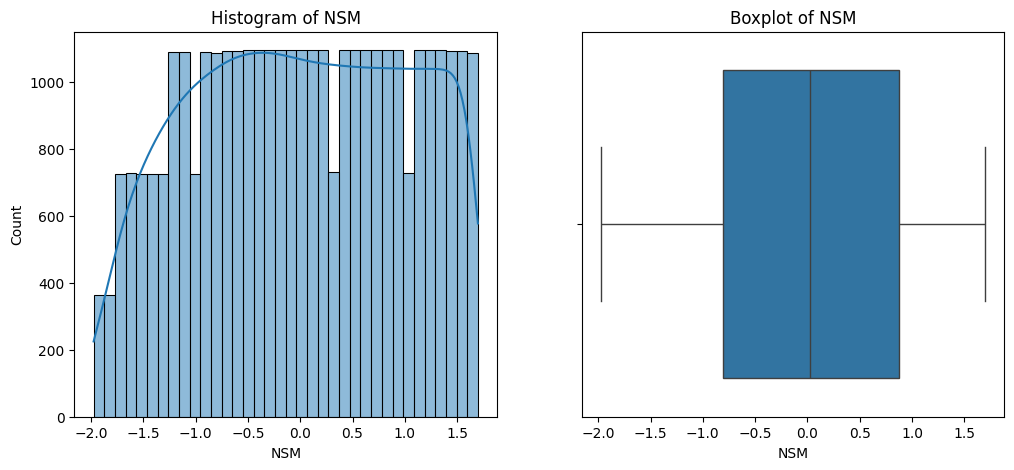

In [27]:
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

# Exploratory Data Analysis (EDA):

Initial data shape: (34959, 10)
          Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count  3.495900e+04                          3.495900e+04   
mean   2.113803e-17                         -9.756015e-18   
std    1.000014e+00                          1.000014e+00   
min   -6.600039e+00                         -1.455166e+00   
25%   -9.396887e-01                         -5.479397e-01   
50%   -4.231400e-01                         -8.856902e-02   
75%    1.153066e+00                          9.788962e-01   
max    1.353024e+00                          1.631782e+00   

       Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  \
count                          3.495900e+04  3.495900e+04   
mean                           6.504010e-17 -1.138202e-16   
std                            1.000014e+00  1.000014e+00   
min                           -6.764264e-01 -8.130630e-01   
25%                           -6.764264e-01 -8.130630e-01   
50%                           -6.764264e-01 -8.13063

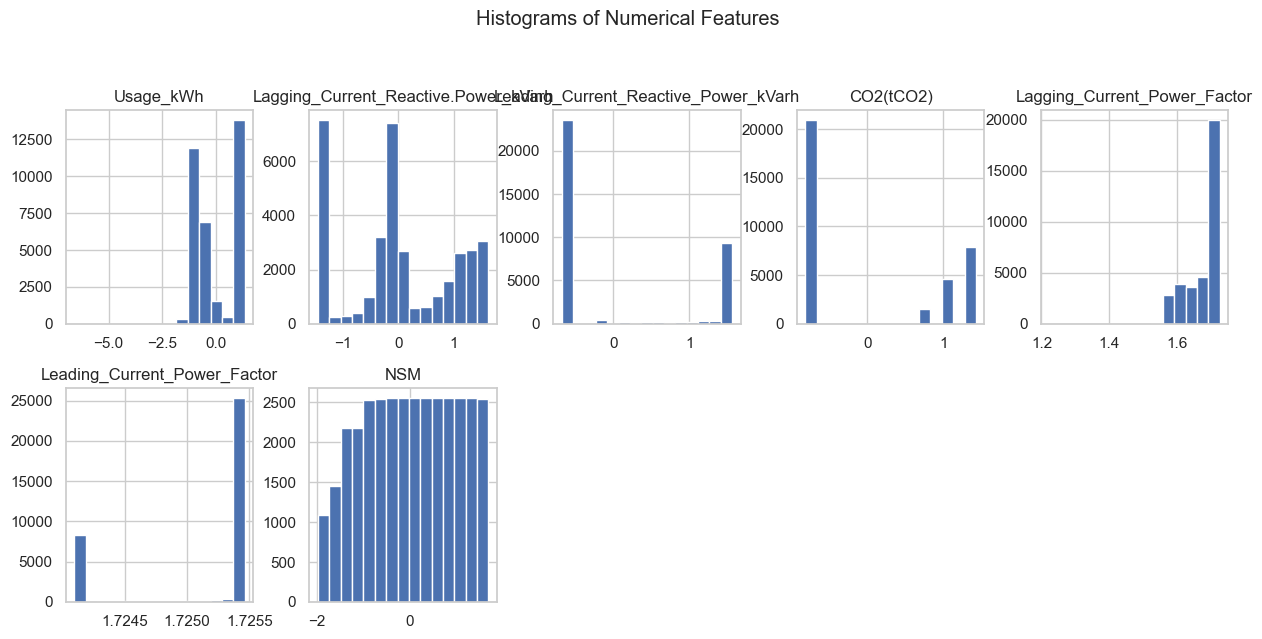

In [28]:
# Display initial data shape and summary statistics
print("Initial data shape:", data.shape)
print(data.describe())

# Display initial skewness
print("Initial skewness:\n", data.select_dtypes(include='number').skew())

# Set up the visualisation style
sns.set(style="whitegrid")

## 1. Histograms for all numerical features
data.select_dtypes(include='number').hist(bins=15, figsize=(15, 10), layout=(3, 5))
plt.suptitle('Histograms of Numerical Features')
plt.show()

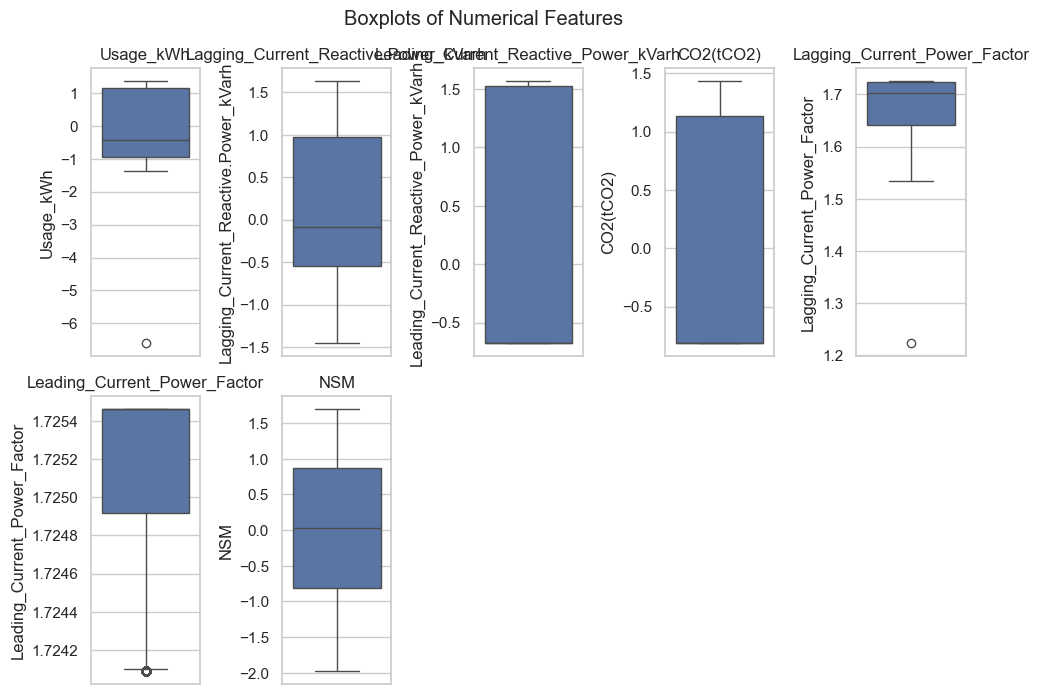

In [29]:
## 2. Boxplots for all numerical features
plt.figure(figsize=(10, 10))
for i, column in enumerate(data.select_dtypes(include='number').columns):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()
plt.suptitle('Boxplots of Numerical Features', y=1.02)
plt.show()

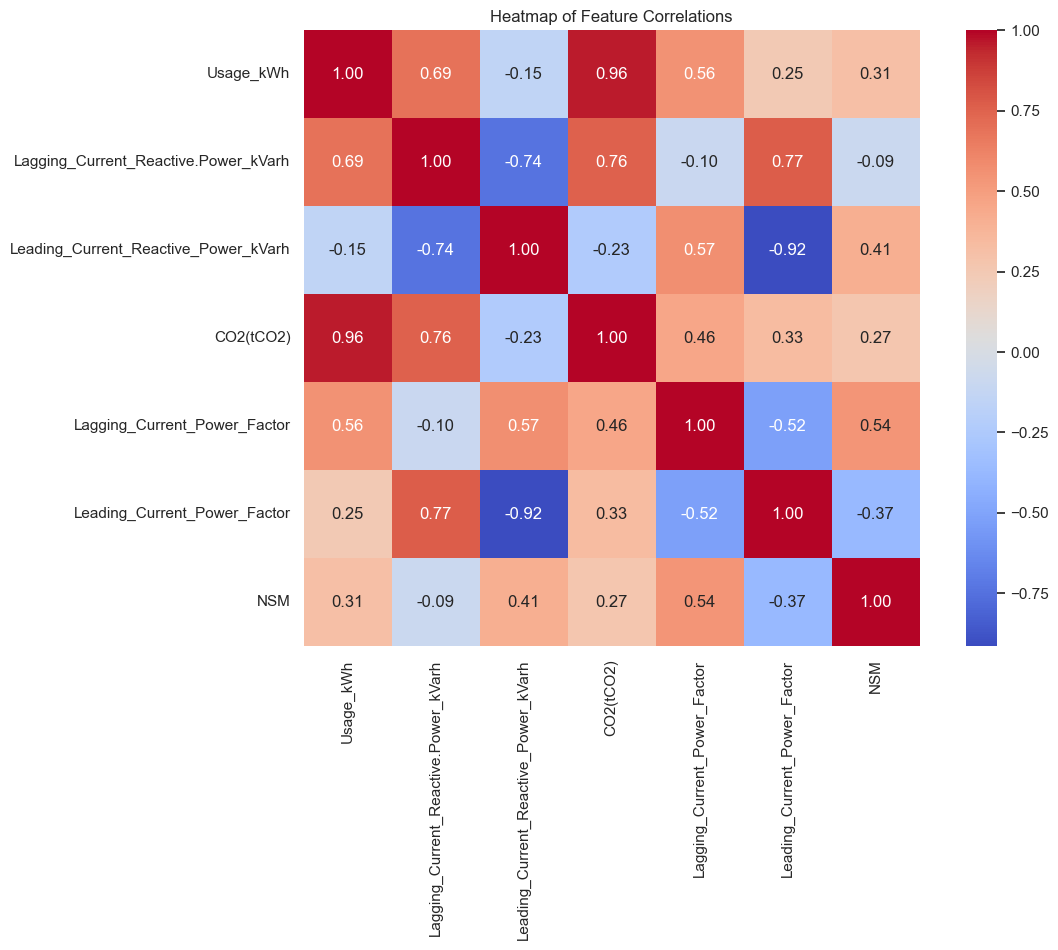

In [30]:
#3. Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Heatmap of Feature Correlations')
plt.show()

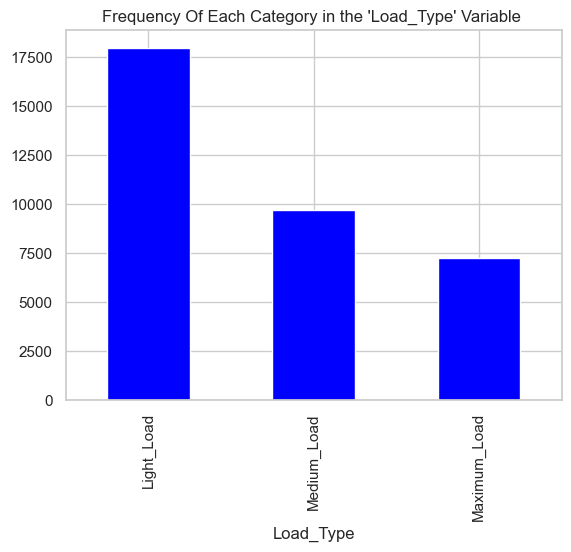

In [31]:
# 4.Bar chart for VISUALIZING THE "Load_Type"
data['Load_Type'].value_counts().plot(kind='bar',color = 'blue')
plt.title("Frequency Of Each Category in the 'Load_Type' Variable ")
plt.show()

# Feature Engineering:

In [32]:
X = data.drop(columns=['Usage_kWh'], axis=1) # Exclude target column
y = data['Usage_kWh']  # Target column

In [33]:
X

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,-0.410116,-0.676426,-0.813063,1.669008,1.725463,-1.838674,Weekday,Monday,Light_Load
1,-0.161236,-0.676426,-0.813063,1.651754,1.725463,-1.759821,Weekday,Monday,Light_Load
2,-0.348514,-0.676426,-0.813063,1.661388,1.725463,-1.693582,Weekday,Monday,Light_Load
3,-0.299823,-0.676426,-0.813063,1.655445,1.725463,-1.634237,Weekday,Monday,Light_Load
4,-0.155614,-0.676426,-0.813063,1.645848,1.725463,-1.579441,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...
35035,-0.106767,-0.676426,-0.813063,1.637971,1.725463,1.590606,Weekday,Monday,Light_Load
35036,-0.270059,-0.676426,-0.813063,1.662529,1.725463,1.626365,Weekday,Monday,Light_Load
35037,-0.368510,0.116136,-0.813063,1.677438,1.725428,1.662117,Weekday,Monday,Light_Load
35038,-0.389034,0.407894,-0.813063,1.680064,1.725393,1.697860,Weekday,Monday,Light_Load


In [34]:
y

0       -0.954547
1       -0.605556
2       -0.920183
3       -0.886863
4       -0.671622
           ...   
35035   -0.660290
35036   -0.702502
35037   -0.686941
35038   -0.686941
35039   -0.730339
Name: Usage_kWh, Length: 34959, dtype: float64

In [35]:
data_1=X.select_dtypes(include="object")
data_1

,WeekStatus,Day_of_week,Load_Type
0,Weekday,Monday,Light_Load
1,Weekday,Monday,Light_Load
2,Weekday,Monday,Light_Load
3,Weekday,Monday,Light_Load
4,Weekday,Monday,Light_Load
...,...,...,...
35035,Weekday,Monday,Light_Load
35036,Weekday,Monday,Light_Load
35037,Weekday,Monday,Light_Load
35038,Weekday,Monday,Light_Load


In [36]:
cat_cleaned_data_columns=list(data_1)
cat_cleaned_data_columns

['WeekStatus', 'Day_of_week', 'Load_Type']

## One-Hot Encoding¶

In [37]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

# Fit and transform the specified categorical columns
encoded_data = enc.fit_transform(X[cat_cleaned_data_columns]).toarray()

encoded_data

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [38]:
# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(cat_cleaned_data_columns))

# Combine the encoded DataFrame with the original cleaned_data (excluding the original categorical columns)
x = pd.concat([X.drop(columns=cat_cleaned_data_columns).reset_index(drop=True), encoded_df], axis=1)

# Display the first few rows of the encoded DataFrame
x

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,-0.410116,-0.676426,-0.813063,1.669008,1.725463,-1.838674,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.161236,-0.676426,-0.813063,1.651754,1.725463,-1.759821,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.348514,-0.676426,-0.813063,1.661388,1.725463,-1.693582,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.299823,-0.676426,-0.813063,1.655445,1.725463,-1.634237,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.155614,-0.676426,-0.813063,1.645848,1.725463,-1.579441,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34954,-0.106767,-0.676426,-0.813063,1.637971,1.725463,1.590606,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34955,-0.270059,-0.676426,-0.813063,1.662529,1.725463,1.626365,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34956,-0.368510,0.116136,-0.813063,1.677438,1.725428,1.662117,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34957,-0.389034,0.407894,-0.813063,1.680064,1.725393,1.697860,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
x.shape

(34959, 18)

In [40]:
x.columns

Index(['Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus_Weekday', 'WeekStatus_Weekend', 'Day_of_week_Friday',
       'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday',
       'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday',
       'Load_Type_Light_Load', 'Load_Type_Maximum_Load',
       'Load_Type_Medium_Load'],
      dtype='object')

# Feature Selection

In [41]:
k = 10  # Specify the number of top features to select 
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(x, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = x.columns[selected_indices]

# Display the selected features
print(f"Selected {k} best features:")
print(selected_features.tolist())

Selected 10 best features:
['Lagging_Current_Reactive.Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'NSM', 'WeekStatus_Weekday', 'WeekStatus_Weekend', 'Day_of_week_Sunday', 'Load_Type_Light_Load', 'Load_Type_Maximum_Load', 'Load_Type_Medium_Load']


In [42]:
X_selected

array([[-0.41011565, -0.81306298,  1.66900766, ...,  1.        ,
         0.        ,  0.        ],
       [-0.1612356 , -0.81306298,  1.65175376, ...,  1.        ,
         0.        ,  0.        ],
       [-0.34851431, -0.81306298,  1.66138799, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.3685101 , -0.81306298,  1.67743765, ...,  1.        ,
         0.        ,  0.        ],
       [-0.38903428, -0.81306298,  1.6800636 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.39663418, -0.81306298,  1.67887542, ...,  1.        ,
         0.        ,  0.        ]])

# Split Data into Training and Testing Sets

In [43]:
x_train,x_test,y_train,y_test = train_test_split(X_selected,y,test_size=0.2,random_state=42)

In [44]:
x_train.shape

(27967, 10)

In [45]:
x_test.shape

(6992, 10)

In [46]:
y_train.shape

(27967,)

In [47]:
y_test.shape

(6992,)

In [48]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [49]:
x_train_scaled

array([[-0.08785052, -0.81205855, -1.40275582, ...,  0.97134053,
        -0.51068292, -0.62146647],
       [-0.06508594, -0.81205855, -1.97509129, ...,  0.97134053,
        -0.51068292, -0.62146647],
       [-0.18041854, -0.81205855, -1.03671562, ...,  0.97134053,
        -0.51068292, -0.62146647],
       ...,
       [-1.45296736,  0.7258606 ,  0.92354289, ..., -1.02950507,
         1.95816223, -0.62146647],
       [-0.18041854, -0.81205855, -0.22063031, ...,  0.97134053,
        -0.51068292, -0.62146647],
       [-1.45296736,  0.7258606 ,  0.92354289, ..., -1.02950507,
        -0.51068292,  1.60909728]])

In [50]:
x_test_scaled

array([[ 1.63641102,  1.42571784,  0.60867403, ..., -1.03138471,
         1.92408023, -0.61106796],
       [-0.66818784,  0.7192831 ,  0.91708849, ..., -1.03138471,
        -0.51972885,  1.6364792 ],
       [ 1.08872533,  1.29488047,  0.58936606, ..., -1.03138471,
        -0.51972885,  1.6364792 ],
       ...,
       [ 0.04115865, -0.81708799, -0.92081403, ...,  0.96957031,
        -0.51972885, -0.61106796],
       [ 1.31035929,  1.29488047,  0.36436665, ..., -1.03138471,
         1.92408023, -0.61106796],
       [ 0.96120471,  1.29488047,  0.73375699, ..., -1.03138471,
        -0.51972885,  1.6364792 ]])

# Build the ML model

In [51]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [52]:
# Regression models
models = {
    "SVR": SVR(),
    "MLP Regressor": MLPRegressor(max_iter=1000, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=42),
 }
# Train the models
trained_models = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(x_train, y_train)
    trained_models[name] = model  # Store the trained model

print("Model Training Complete.")


Training SVR...
Training MLP Regressor...
Training Random Forest Regressor...
Training Linear Regression...
Training Gradient Boosting...
Training AdaBoost Regressor...
Model Training Complete.


# Model Evaluation

In [53]:
# Evaluate the models
results = {}

for name, model in trained_models.items():
    y_pred = model.predict(x_test)

    # Calculate MAE, MSE, RMSE, and R2 Score
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)


    # Display the evaluation metrics
    print(f"{model} - Model Evaluation Metrics:")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R² Score: {r2:.4f}\n")

SVR() - Model Evaluation Metrics:
  MAE: 0.0834
  MSE: 0.0197
  RMSE: 0.1403
  R² Score: 0.9805

MLPRegressor(max_iter=1000, random_state=42) - Model Evaluation Metrics:
  MAE: 0.0703
  MSE: 0.0171
  RMSE: 0.1307
  R² Score: 0.9831

RandomForestRegressor(random_state=42) - Model Evaluation Metrics:
  MAE: 0.0486
  MSE: 0.0186
  RMSE: 0.1364
  R² Score: 0.9816

LinearRegression() - Model Evaluation Metrics:
  MAE: 0.1686
  MSE: 0.0534
  RMSE: 0.2311
  R² Score: 0.9472

GradientBoostingRegressor(random_state=42) - Model Evaluation Metrics:
  MAE: 0.0750
  MSE: 0.0214
  RMSE: 0.1463
  R² Score: 0.9788

AdaBoostRegressor(random_state=42) - Model Evaluation Metrics:
  MAE: 0.1508
  MSE: 0.0498
  RMSE: 0.2231
  R² Score: 0.9508



In [54]:
# Initialize an empty list to store the results
results = []

# Loop through the trained models to calculate evaluation metrics
for name, model in trained_models.items():
    y_pred = model.predict(x_test)

    # Calculate MAE, MSE, RMSE, and R² Score
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store the results in the list
    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R² Score": r2
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the model summary DataFrame
print("Model Performance Summary:")
results_df

Model Performance Summary:


,Model,MAE,MSE,RMSE,R² Score
0,SVR,0.083392,0.019688,0.140312,0.980536
1,MLP Regressor,0.070322,0.017091,0.130732,0.983103
2,Random Forest Regressor,0.048564,0.018614,0.136433,0.981597
3,Linear Regression,0.168611,0.053419,0.231126,0.947186
4,Gradient Boosting,0.075035,0.021417,0.146344,0.978826
5,AdaBoost Regressor,0.150843,0.049776,0.223105,0.950788


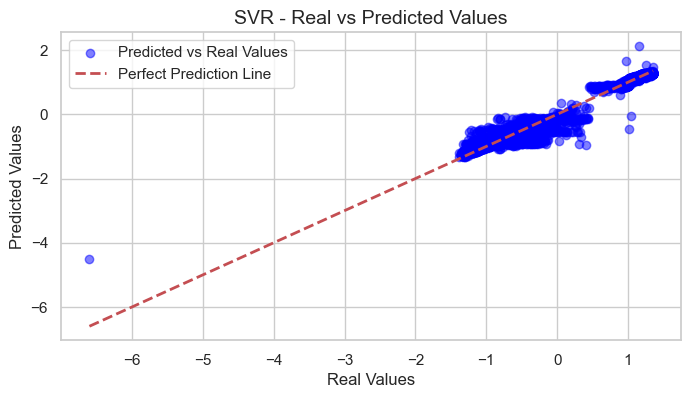

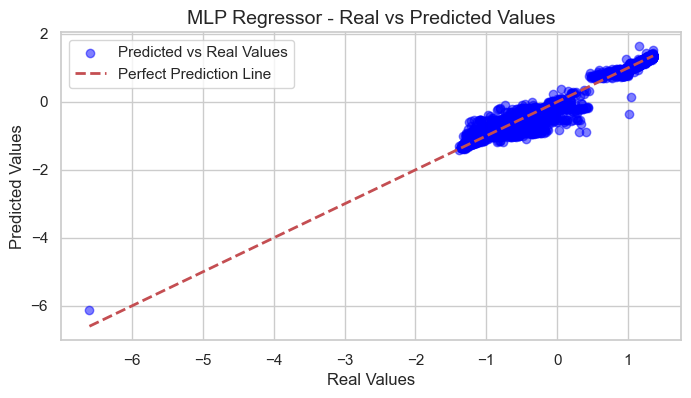

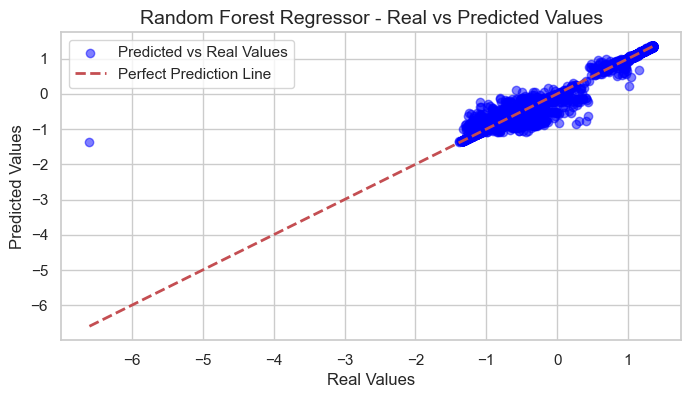

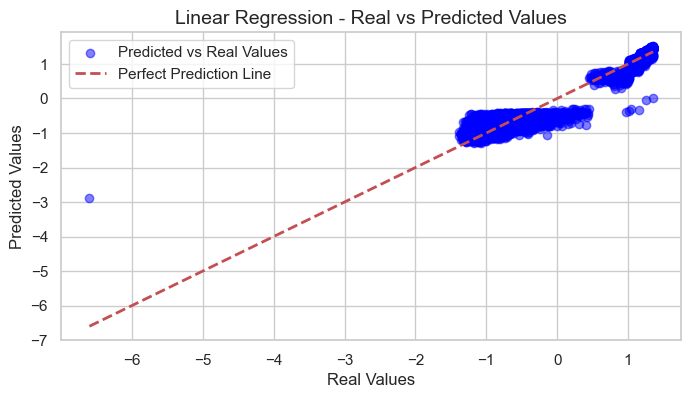

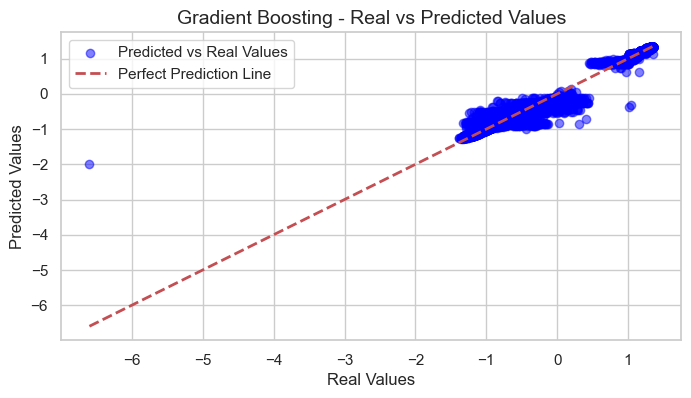

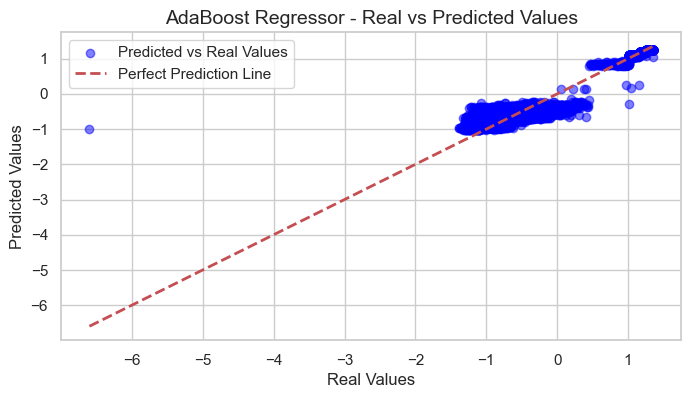

In [60]:
# Loop through the trained models and plot real vs predicted values
for name, model in trained_models.items():
    y_pred = model.predict(x_test)

    # Plot real vs predicted values
    plt.figure(figsize=(8, 4))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Real Values', alpha=.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction Line', lw=2)  # Line of perfect prediction
    plt.title(f'{name} - Real vs Predicted Values', fontsize=14)
    plt.xlabel('Real Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

In [61]:
# Find the best model based on R² score
best_model_name = results_df['R² Score'].idxmax()
best_model_metrics = results_df.loc[best_model_name]

print("\nBest Model:")
print(f"  Model: {best_model_name}")
print(f"  Metrics: \n{best_model_metrics}")


Best Model:
  Model: 1
  Metrics: 
Model       MLP Regressor
MAE              0.070322
MSE              0.017091
RMSE             0.130732
R² Score         0.983103
Name: 1, dtype: object
